# Import packages

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_dog, blob_log
import hyperspy.api as hs

from Gaen_packages.Gaen_packages import ImageTreatment_and_interfaces as ii
from Gaen_packages.Gaen_packages.denoising import denoiser
from Gaen_packages.Gaen_packages.fft_processing.fft_loader import experimental_fft_with_log


 Loading DL model 

DL model loaded succesfully 



# Load images

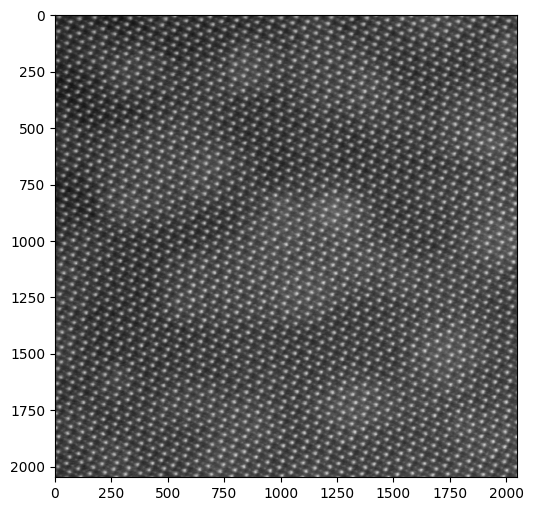

In [4]:
# file_path = 'auxiliar_data\\atoms.jpg'
# file_path = r'C:\Users\ipinto\OneDrive - INSTITUT CATALÀ DE NANOCIENCIA I NANOTECNOLOGÍA\PhD\Congresos\QuantumMatters2024\data\video2\d_0000.png'

# image = np.array(Image.open(file_path))
# if len(image.shape) == 3:
#     image = image[:,:,0]

file_path = 'S:\Ivan Pinto\Helena\\0028 - AlOx-BiVO4 HAADF-DF 5.20 Mx HAADF.dm4'
signal = hs.load(file_path)
image = signal.data

ii.multiplot(image)

# Denoise image (optional)

Batch 1/1
1 image was decoded in approximately 7.2247 seconds


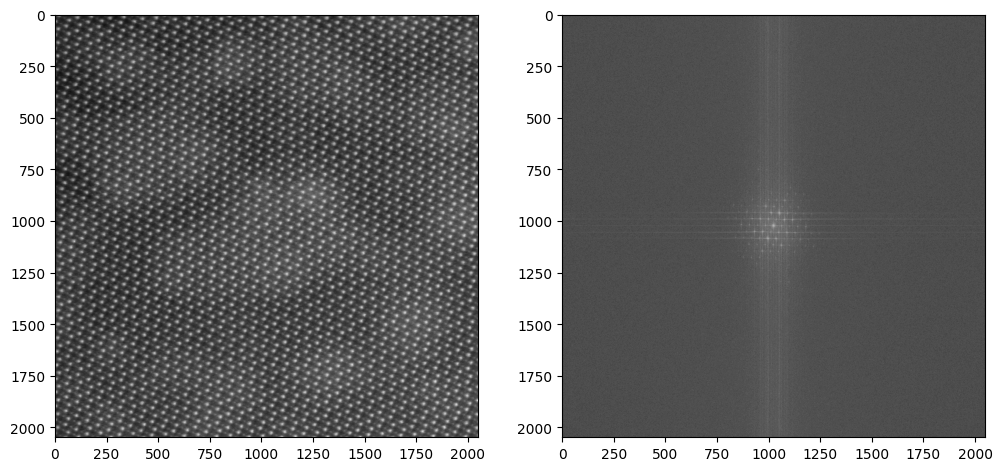

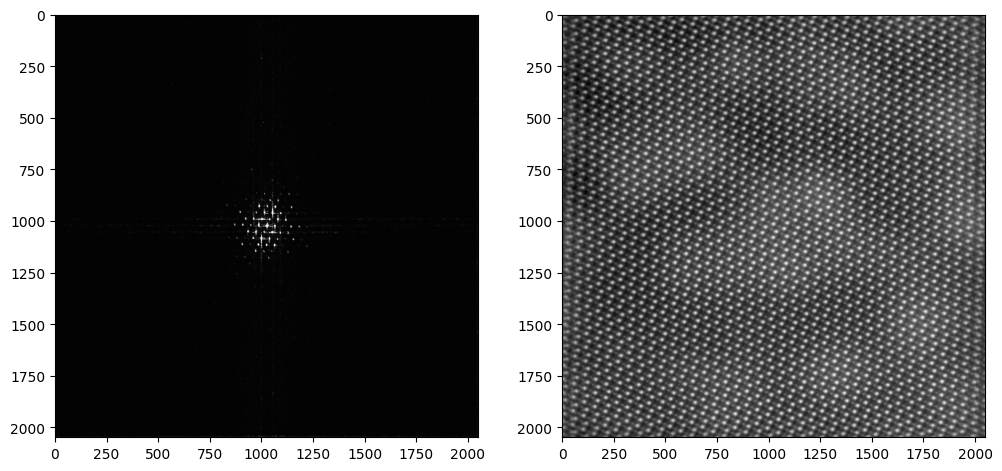

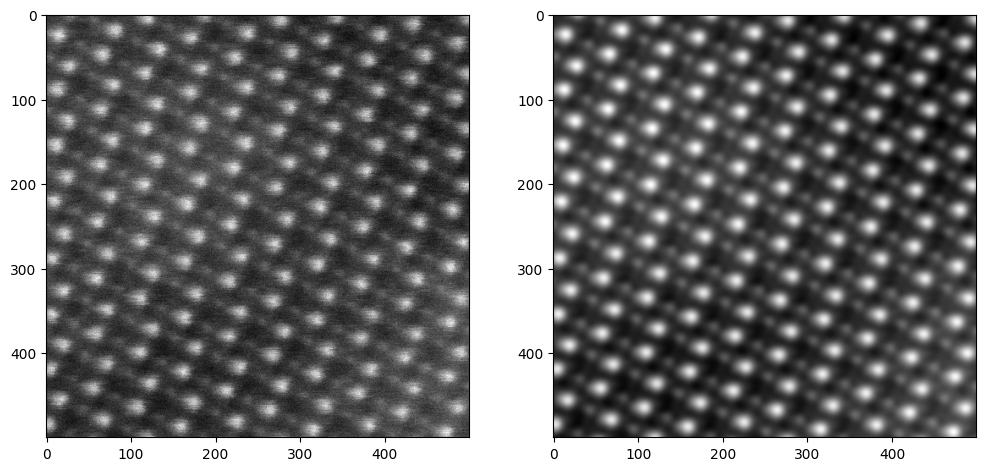

In [5]:
dic_process = denoiser.denoise(image, show_process = True)
process = list(dic_process.values())
image_denoised = process[-1]

ii.multiplot(*process[:2])
ii.multiplot(*process[2:])
ii.multiplot(process[0][500:1000, 500:1000], process[-1][500:1000, 500:1000])

In [18]:
ii.save_matrix_as_image(process[-1][500:1000, 500:1000], 'denoising_r', _format = '.tif', quality=16)
ii.save_matrix_as_image(process[0][500:1000, 500:1000], 'original_hr', _format = '.tif', quality=16)

# Detect atomic positions

In [12]:
%matplotlib qt

max_sigma = 9
min_sigma = 8
threshold_rel = 0.3

# image_sample = image_denoised[500:1000, 500:1000].copy() # image if you don't denoise
image_sample = image_denoised.copy()

blobs_log = blob_log(image_sample,  max_sigma=max_sigma, min_sigma=min_sigma, threshold_rel= threshold_rel, exclude_border = max_sigma)
blobs_dog = blob_dog(image_sample,  max_sigma=max_sigma, min_sigma=min_sigma, threshold_rel= threshold_rel, exclude_border = max_sigma)
# blobs_log[:, 2] = blobs_log[:, 2] * np.sqrt(2)

blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussians']
sequence = zip(blobs_list, colors, titles)
print(len(blobs_log))

fig, axes = plt.subplots(1,3)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].imshow(image_sample, cmap = 'gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[-1].imshow(image_sample, cmap = 'gray')
    
plt.tight_layout()
plt.show()

2396
